In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

from skeletonize import skeletonize
import cv2

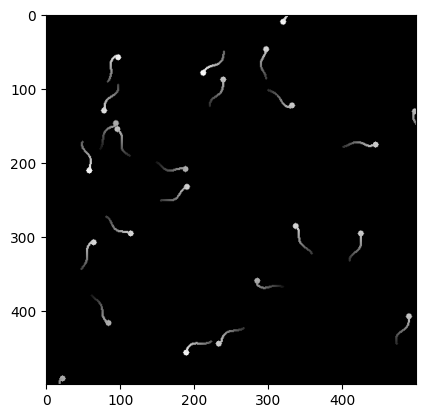

In [ ]:
videofile = "ExampleVideos/NJITsynthetic1.mp4"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

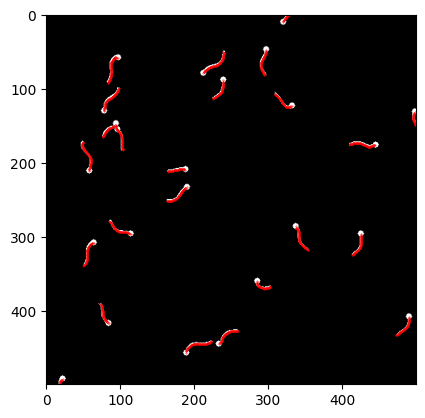

In [24]:
bw = tracker.threshold(frame)

num_labels, label_im, stats, _ = cv2.connectedComponentsWithStats(bw, 4, cv2.CV_32S)

skel = skeletonize()

all_skeletons = []

for i in range(1, num_labels):
    component = (label_im == i).astype(np.uint8)
    s = skel.skeleton(component)
    all_skeletons.append(s)

plt.imshow(bw, cmap='gray')

for s in all_skeletons:
    for i in range(len(s)):
        plt.scatter(s[i][:,1], s[i][:,0], s=0.1, c='r')
plt.show()



### Feed through the tracking pipeline

In [ ]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

In [ ]:
importlib.reload(tracker)

compute_segments = True
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.computeAllStats(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [ ]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final, visualization="segments")